**Alifia Shafira**

**1301194102**

**IF-43-04**

Library yang Digunakan

In [353]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans #untuk pengecekan di akhir

Eksplorasi & Preprocessing Data (Cleansing, Scaling)

In [354]:
#membaca dataset csv dan memasukkan ke variabel data
data = pd.read_csv('kendaraan_train.csv')
data.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [355]:
#menghitung ada berapa data
data.count

<bound method DataFrame.count of             id Jenis_Kelamin  ...  Lama_Berlangganan  Tertarik
0            1        Wanita  ...               97.0         0
1            2          Pria  ...              158.0         0
2            3           NaN  ...              119.0         0
3            4        Wanita  ...               63.0         0
4            5          Pria  ...              194.0         0
...        ...           ...  ...                ...       ...
285826  285827        Wanita  ...              217.0         0
285827  285828        Wanita  ...               50.0         0
285828  285829        Wanita  ...              226.0         0
285829  285830          Pria  ...              270.0         0
285830  285831          Pria  ...               44.0         0

[285831 rows x 12 columns]>

In [356]:
#melihat jenis-jenis tipe data pada dataset
data.dtypes

id                     int64
Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

In [357]:
#mengecek apakah ada nilai yang kosong
data.isna().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [358]:
#untuk mendrop semua elemen yang ada nilai kosongnya
data = data.dropna()

In [359]:
#mengecek apakah masih ada nilai kosongnya
data.isna().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [360]:
#melihat korelasi data
data.corr()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
id,1.000000,0.003523,-0.004080,0.000719,-0.003694,0.002145,-0.001707,0.002600,0.000004
Umur,0.003523,1.000000,-0.078543,0.044256,-0.256815,0.063838,-0.576009,-0.001032,0.108912
SIM,-0.004080,-0.078543,1.000000,-0.005862,0.016459,-0.012864,0.041575,0.001739,0.008675
Kode_Daerah,0.000719,0.044256,-0.005862,1.000000,-0.024393,-0.012462,-0.043988,-0.003798,0.011152
Sudah_Asuransi,-0.003694,-0.256815,0.016459,-0.024393,1.000000,0.003988,0.221583,0.002902,-0.340711
Premi,0.002145,0.063838,-0.012864,-0.012462,0.003988,1.000000,-0.112297,-0.001260,0.021890
Kanal_Penjualan,-0.001707,-0.576009,0.041575,-0.043988,0.221583,-0.112297,1.000000,0.000878,-0.140968
Lama_Berlangganan,0.002600,-0.001032,0.001739,-0.003798,0.002902,-0.001260,0.000878,1.000000,0.002143
Tertarik,0.000004,0.108912,0.008675,0.011152,-0.340711,0.021890,-0.140968,0.002143,1.000000


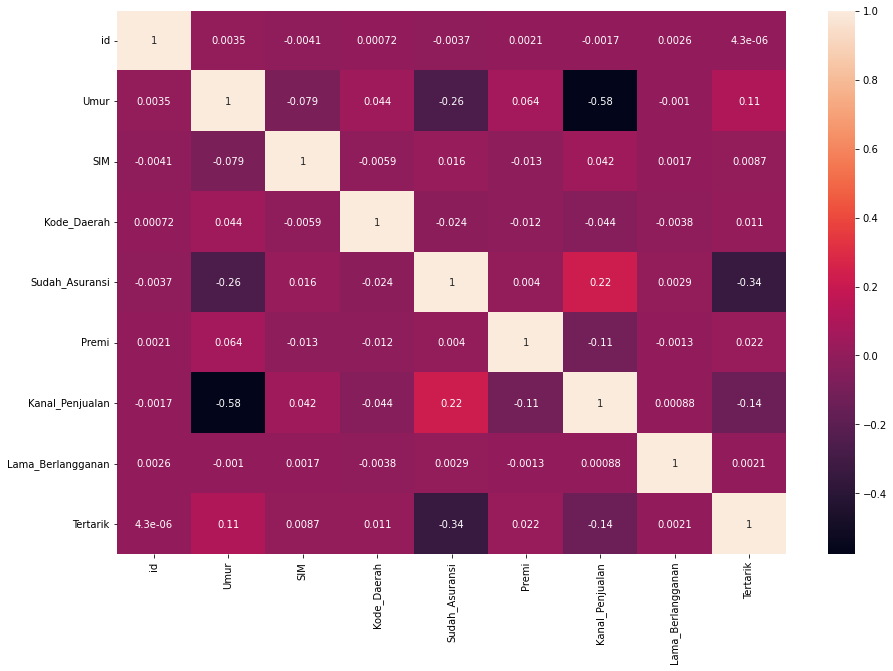

In [361]:
#mengecek korelasi antar data dengan heatmap
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot = True)

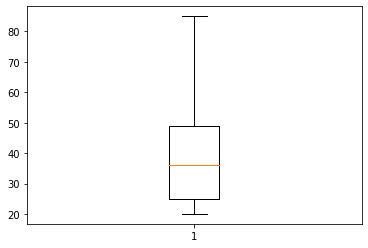

In [362]:
#mengecek outliers pada dataset
plt.boxplot(data['Umur'])
plt.show()
#hasil menunjukkan tidak ada outlier

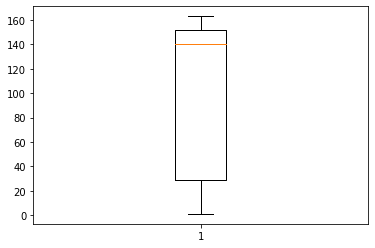

In [363]:
#mengecek outliers pada dataset
plt.boxplot(data['Kanal_Penjualan'])
plt.show()
#hasil menunjukkan tidak ada outlier

In [364]:
#mengecek apakah ada data yang duplikat
data['Umur'].duplicated()

0         False
1         False
3         False
5         False
8         False
          ...  
285826     True
285827     True
285828     True
285829     True
285830     True
Name: Umur, Length: 171068, dtype: bool

In [365]:
#mengecek apakah ada data yang duplikat
data['Kanal_Penjualan'].duplicated()

0         False
1         False
3         False
5          True
8         False
          ...  
285826     True
285827     True
285828     True
285829     True
285830     True
Name: Kanal_Penjualan, Length: 171068, dtype: bool

In [366]:
#mendrop data yang duplikat
copyData = data[['Umur','Kanal_Penjualan']]
copyData.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [367]:
#mengecek kembali apa masih ada duplikat data
copyData.duplicated().any()

False

In [368]:
#mengecek jumlah data yang ada
copyData.count

<bound method DataFrame.count of         Umur  Kanal_Penjualan
0       30.0            152.0
1       48.0             29.0
3       58.0            124.0
5       21.0            152.0
8       20.0            160.0
...      ...              ...
282832  46.0             56.0
283304  57.0             91.0
284121  31.0             11.0
284919  36.0            113.0
285165  30.0            127.0

[3452 rows x 2 columns]>

In [369]:
#melakukan scaling dengan library yang tersedia, metode yang digunakan yaitu Min Max Normalization
beforeScaling = MinMaxScaler()
afterScaling = beforeScaling.fit_transform(copyData)
finalData = pd.DataFrame(afterScaling, columns = ['Umur', 'Kanal_Penjualan'])
finalData.to_csv('finalData.csv')
dataForUse = pd.read_csv('finalData.csv')
dataForUse.drop(dataForUse.columns[0], axis=1, inplace=True)
dataForUse.head()

,Umur,Kanal_Penjualan
0,0.153846,0.932099
1,0.430769,0.172840
2,0.584615,0.759259
3,0.015385,0.932099
4,0.000000,0.981481


In [370]:
x = dataForUse.iloc[:, [0,1]].values
print(x)

[[0.15384615 0.93209877]
 [0.43076923 0.17283951]
 [0.58461538 0.75925926]
 ...
 [0.16923077 0.0617284 ]
 [0.24615385 0.69135802]
 [0.15384615 0.77777778]]


KMeans

Text(0.5, 1.0, 'Sebelum Clustering')

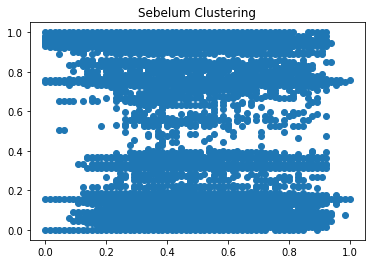

In [371]:
Umur = x[:,0]
KanalPenjualan = x[:,1]
plt.scatter(Umur, KanalPenjualan)
plt.title('Sebelum Clustering')

In [372]:
def randomCentroid(k, x, baris):
  #memasukkan nilai random centroid ke dalam array

  allCentroid = np.array([]). reshape(kolom,0)
  for i in range(k):
    allCentroid = np.c_[allCentroid, x[random.randint(0, baris-1)]]

  return allCentroid

In [373]:
def countEuclidean(k, x, allCentroid):
  #memasukkan nilai jarak eculidean ke dalam array

  allEuclid = np.array([]).reshape(baris,0)
  for i in range(k):
    distance = np.sum((x-allCentroid[:,i])**2, axis = 1)
    allEuclid = np.c_[allEuclid, distance]

  return allEuclid

In [385]:
def clusterAssign(baris, k, x, min, allCentroid):
  #menghitung rata-rata dari cluster yang terpisah
  centroid ={}
  for i in range(k):
    centroid[i+1] = np.array([]).reshape(2,0)

  #memasukkan cluster ke titik
  for i in range(baris):
    centroid[min[i]] = np.c_[centroid[min[i]], x[i]]

  for i in range(k):
    centroid[i+1] = centroid[i+1].T

  #hitung rata-ratanya dan perbarui nilai centroid
  for i in range(k):
    allCentroid[:,i] = np.mean(centroid[i+1], axis = 0)

  return centroid

In [387]:
baris = dataForUse.shape[0] #sebanyak datanya
kolom = 2 #sebanyak variabel yang dipakai (umur dan kanal penjualan)
iteration = 3
x = dataForUse.iloc[:, [0,1]].values
#berdasarkan hasil elbow method
k = 3

allCentroid = randomCentroid(k, x, baris)
allEuclid = countEuclidean(k, x, allCentroid)
#dicari nilai minimumnya
min = np.argmin(allEuclid, axis = 1) + 1
centroid = clusterAssign(baris, k, x, min, allCentroid)


#sama seperti diatas tapi dilakukan iterasi berulang kali 
for i in range(iteration):
  allEuclid = countEuclidean(k, x, allCentroid)
  cent = np.argmin(allEuclid, axis = 1) + 1
  centroid = {}  
  centroid = clusterAssign(baris, k, x, min, allCentroid)

  final = centroid


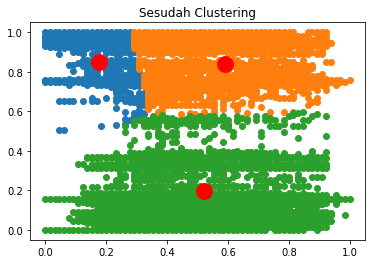

In [388]:
for i in range(k):
    plt.scatter(final[i+1][:,0],final[i+1][:,1])
plt.scatter(allCentroid[0,:],allCentroid[1,:],s=250,c='red')
plt.title('Sesudah Clustering')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


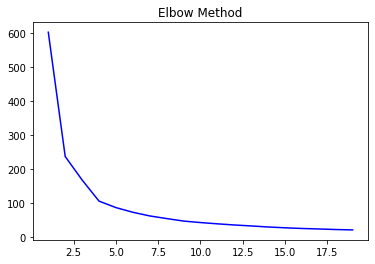

In [377]:
from sklearn.cluster import KMeans
elbow=[]
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
    kmeans.fit(x)
    elbow.append(kmeans.inertia_)
sns.lineplot(range(1, 20), elbow,color='blue')
plt.title('Elbow Method')
plt.show()

Mengevaluasi dengan mengecek menggunakan library KMeans

[2 0 1 ... 0 2 2]


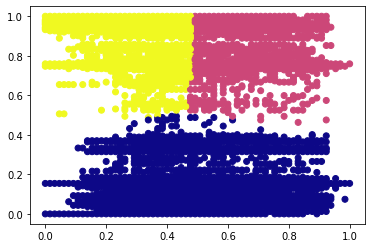

In [378]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
data1=dataForUse.values
y_test = kmeans.fit_predict(data1)

plt.scatter(data1[:, 0], data1[:, 1], c=y_test, cmap='plasma')
print(y_test)
plt.show()

